In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy import random as rand
from pydataset import data

## Probelm 1

In [2]:
i = np.linspace(0, 50, 26)
t = i ** 2 - 1

series = pd.Series(t, index=i, name="Series")

series[np.array([i % 3 == 0 for i in series.index])] = 0

## Problem 2

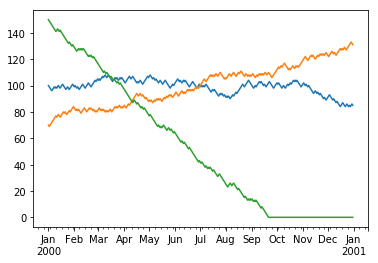

In [3]:
#I didn't exactly follow the instructions, I realize.

def valtomorrow(p, v_t):
    '''
    Executes one step of the stock movement. Inputs are p = 
    probability of stock going up, v_t = value today. Output
    is v_tprime = v_t plus or minus 1
    '''
    z = rand.binomial(1, p)
    if z == 1:
        v_tprime = v_t + 1
    else:
        v_tprime = v_t - 1
    return(v_tprime)
    
def randomwalk(p, d=100):
    '''
    This function models the random movements of a volatile 
    stock. Inputs are d = the dollar amount at the beginning 
    and p = the probability of the stock going up. Output is
    a series that has the stock value at each date between 1 
    Jan 2000 and 31 Dec 2000.
    '''
    dates = pd.date_range("1/1/2000", "12/31/2000", freq = "D")
    #note that this includes leap year
    series = pd.Series(np.zeros(366), index = dates)
   
    #do the random walk
    series[0] = d
    for i in range(1, 366):
        series[i] = valtomorrow(p, series[i-1])
    
    #correct for negative entries
    series[np.array([series[i] < 0 for i in series.index])] = 0
    return series

s1 = randomwalk(.5, 100)
s2 = randomwalk(.6, 70)
s3 = randomwalk(.2, 150)

s1.plot()
s2.plot()
s3.plot()

## Exercise 3

In [4]:
# Build Toy Data
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', \
        'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, \
                            'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': \
                         major})

#Execute Query
studentInfo[(studentInfo['Age'] > 19) & (studentInfo['Sex'] =='M')]\
[['ID', 'Name']]


,ID,Name
0,0,Mylan
6,6,Matt


## Problem 4

In [5]:
pd.merge(studentInfo[(studentInfo['Sex']=='M')][['ID', 'Age']], \
         otherInfo[['ID', 'GPA']], on = 'ID', how= 'inner')

,ID,Age,GPA
0,0,20,3.8
1,2,18,3.0
2,4,19,2.8
3,6,20,3.8
4,7,19,3.4


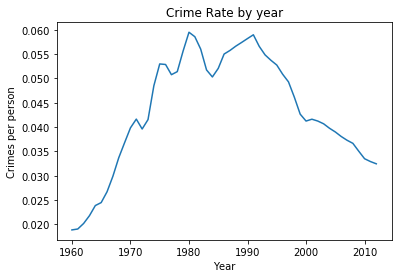

The top years for crime rate in descending order are:
The average number of total crimes from 1960 to 2012 is:
10638068.075471697
The average number of burglaries from 1960 to 2012 is:
2446286.2075471696
The years for which total number of crimes were below average but burglaries were above average are: 


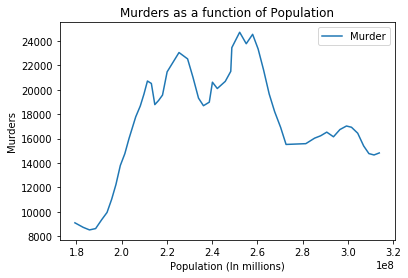

In [6]:
#Redin
df = pd.read_csv('Data/crime_data.csv', header = 1, index_col = 0)

#Mess with data
df['Crime Rate'] = df['Total'] / df['Population']

yearrate = pd.Series(df['Crime Rate'], df.index)
yearrate.plot()
plt.ylabel('Crimes per person')
plt.title("Crime Rate by year")
plt.show()

print("The top years for crime rate in descending order are:")
df.sort_values('Crime Rate', ascending = False).head().index.tolist()

print("The average number of total crimes from 1960 to 2012 is:")
print(df['Total'].mean())
print("The average number of burglaries from 1960 to 2012 is:")
print(df['Burglary'].mean())

print("The years for which total number of crimes were below average \
but burglaries were above average are: ")
df[ ( df['Total'] < df['Total'].mean() ) & ( df['Burglary'] > \
df['Burglary'].mean() ) ].index.tolist()

df.plot('Population', 'Murder')
plt.title('Murders as a function of Population')
plt.xlabel('Population (In millions)')
plt.ylabel('Murders')
plt.show()

df[['Population', 'Violent', 'Robbery']].to_csv('Data/crime_subset.csv')

## Exercise 6

In [98]:
from pydataset import data

#Cleaning
df = pd.read_csv('Data/titanic.csv', header = 0)
df = df.drop(columns = ['Sibsp', 'Parch', 'Cabin', 'Boat', 'Body'])
df = df.dropna(subset = ['Survived'])
df['Survived'] = (df['Survived']==1)
print(df['Age'].mean())
df.fillna({'Age': df['Age'].mean()})
df.to_csv('Data/titanic_clean.csv')

#Analysis 

print("This many people survived:", df['Survived'].sum())
print("This percent of passengers survived:", 100 * (df['Survived'].sum() / len(df['Survived'])))
print("This was the average price of a ticket:", df['Fare'].mean())
print("This was the price of the most expensive ticket:", df['Fare'].max())
print("This was the age of the oldest survivor:", df[df['Survived'] == 1]['Age'].max())
print("This was the age of the youngest survivor:", df[df['Survived'] == 1]['Age'].min())
print("This was the age of the oldest nonsurvivor:", df[df['Survived'] == 0]['Age'].max())
print("This was the age of the youngest nonsurvivor:", df[df['Survived'] == 0]['Age'].min())

29.8811345124283
This many people survived: 500
This percent of passengers survived: 38.19709702062643
This was the average price of a ticket: 33.29547928134572
This was the price of the most expensive ticket: 512.3292
This was the age of the oldest survivor: 80.0
This was the age of the youngest survivor: 0.1667
This was the age of the oldest nonsurvivor: 74.0
This was the age of the youngest nonsurvivor: 0.3333
